In [1]:
! pip install nltk, joblib

ERROR: Invalid requirement: 'nltk,'


In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
import re
import chardet
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/k2257956/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/k2257956/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
filename = './../datasets/SMS Spam Collection/final/spam.csv'

In [4]:
with open(filename, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large
df = pd.read_csv(filename, encoding=result['encoding'])

In [5]:
df.head()

,target,text
0,0,"I am late,so call you tomorrow morning.take ca..."
1,0,U r too much close to my heart. If u go away i...
2,0,Wait &lt;#&gt; min..
3,0,Can you call me plz. Your number shows out of ...
4,0,MAYBE IF YOU WOKE UP BEFORE FUCKING 3 THIS WOU...


In [8]:
# Text Cleaning
df['text'] = df['text'].apply(lambda x: x.lower()) # convert to lower case
df['text'] = df['text'].apply(lambda x: re.sub('[^a-z\s]', '', x)) # remove special characters and numbers

# Tokenization
df['text'] = df['text'].apply(lambda x: word_tokenize(x))

# Stop Word Removal
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: [word for word in x if word not in stop_words])

# Stemming
stemmer = PorterStemmer()
df['text'] = df['text'].apply(lambda x: [stemmer.stem(word) for word in x])

# Convert list of words back to string
df['text'] = df['text'].apply(lambda x: ' '.join(x))

# Vectorization (TF-IDF)
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(df['text'])

In [9]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, df['target'], test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

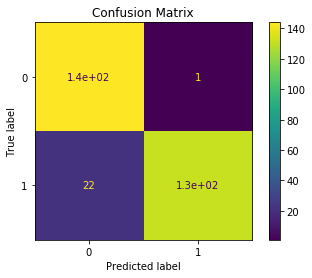

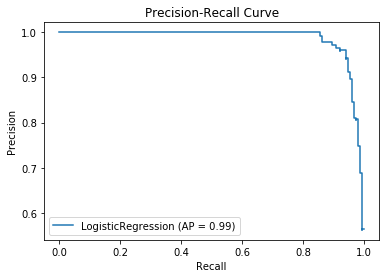

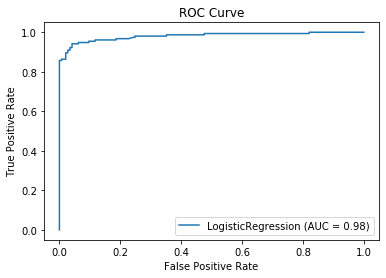

In [10]:
# Plot Confusion Matrix
plot_confusion_matrix(model, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()

# Plot Precision-Recall Curve
plot_precision_recall_curve(model, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

# Plot ROC Curve
plot_roc_curve(model, X_test, y_test)
plt.title('ROC Curve')
plt.show()

In [11]:
# Assuming 'y_pred' are your model's predictions and 'y_test' are the true labels
y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.9924812030075187
Recall: 0.8571428571428571
F1 Score: 0.9198606271777003


In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       145
           1       0.99      0.86      0.92       154

    accuracy                           0.92       299
   macro avg       0.93      0.93      0.92       299
weighted avg       0.93      0.92      0.92       299



In [13]:
# Assuming 'y_pred' are your model's predictions and 'y_test' are the true labels
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9230769230769231


In [14]:
# Calculate accuracy on the training set
train_preds = model.predict(X_train)
train_acc = accuracy_score(y_train, train_preds)
print(f'Training Accuracy: {train_acc}')

# Calculate accuracy on the test set
test_preds = model.predict(X_test)
test_acc = accuracy_score(y_test, test_preds)
print(f'Test Accuracy: {test_acc}')

Training Accuracy: 0.9707112970711297
Test Accuracy: 0.9230769230769231


In [15]:
from joblib import dump, load
# Save the model to a file
dump(model, './../models/model.joblib') 
# save the vectorizer
dump(vectorizer, './../models/tfidf_vectorizer.joblib')

['./../models/tfidf_vectorizer.joblib']